In [ ]:
!nvidia-smi

Sat Oct 12 11:05:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.7/882.7 kB 26.1 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.10 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.6/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="RykpbxOETwiiQ35TmHG0")
project = rf.workspace("new-workspace-azkls").project("meyve-nrjlx")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
dataset.location

'/content/meyve-1'

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=10 imgsz=640

Ultralytics 8.3.10 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/meyve-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

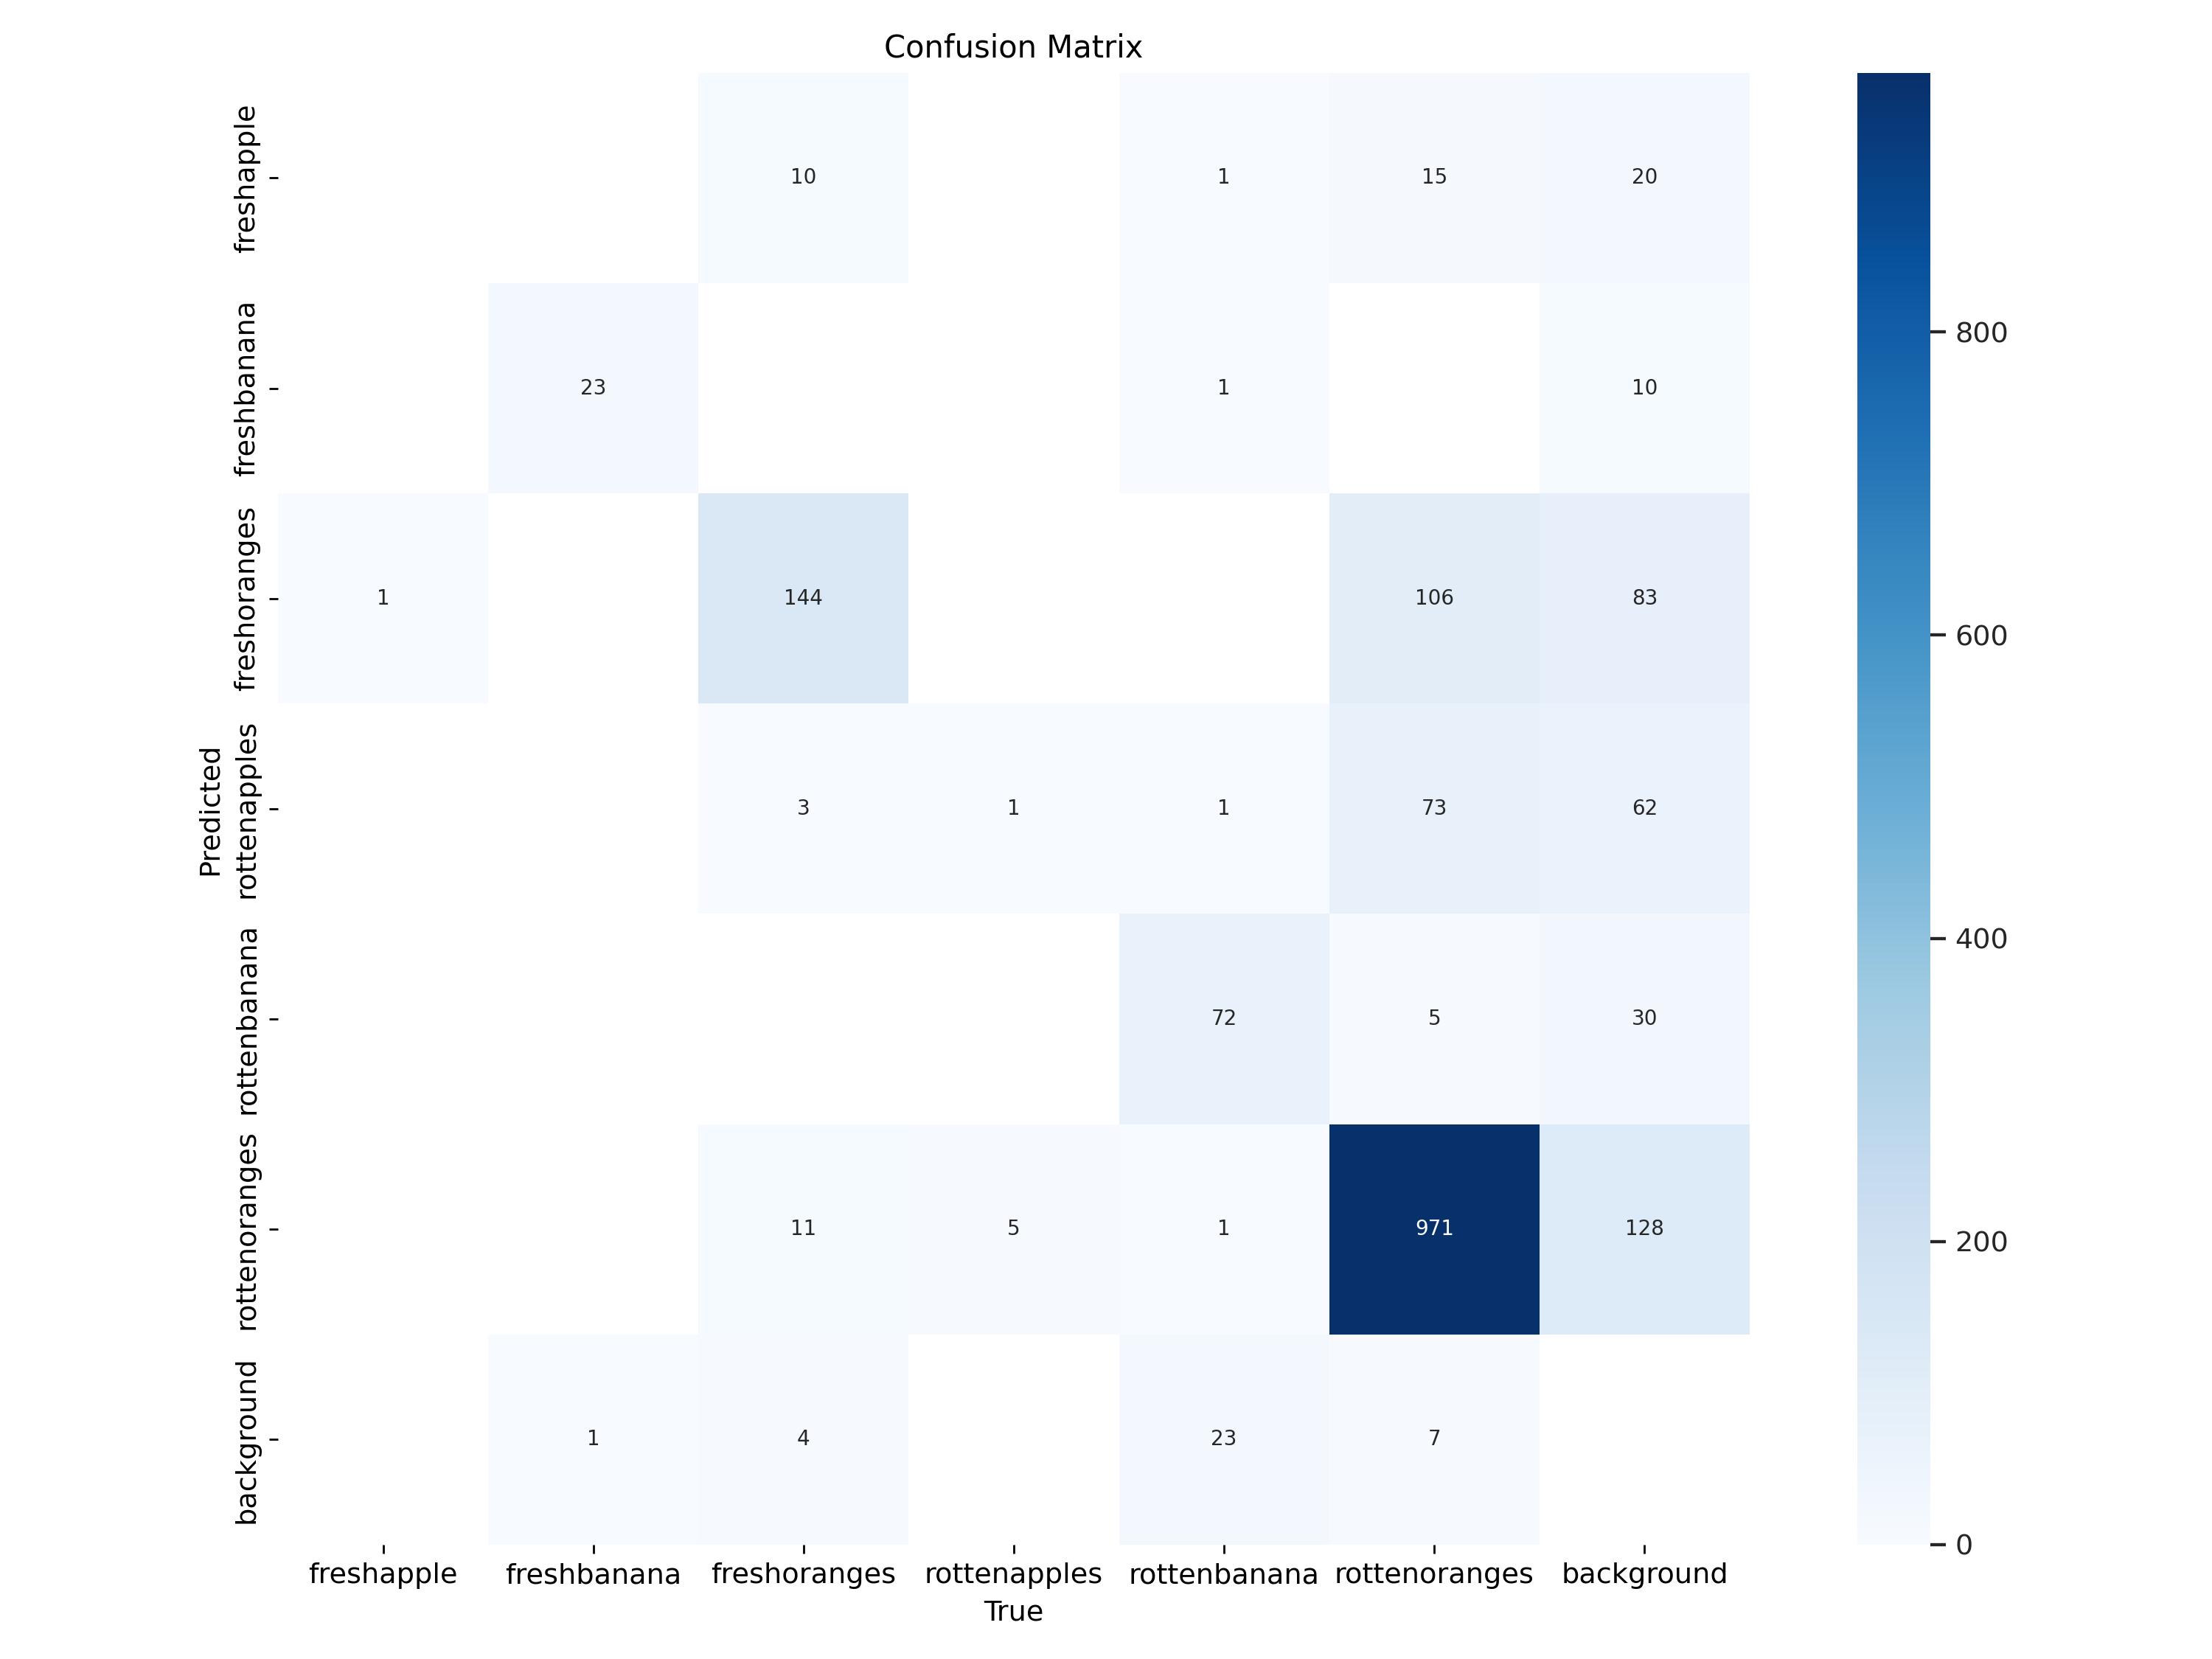

In [ ]:
Image("/content/runs/detect/train3/confusion_matrix.png", width=600)

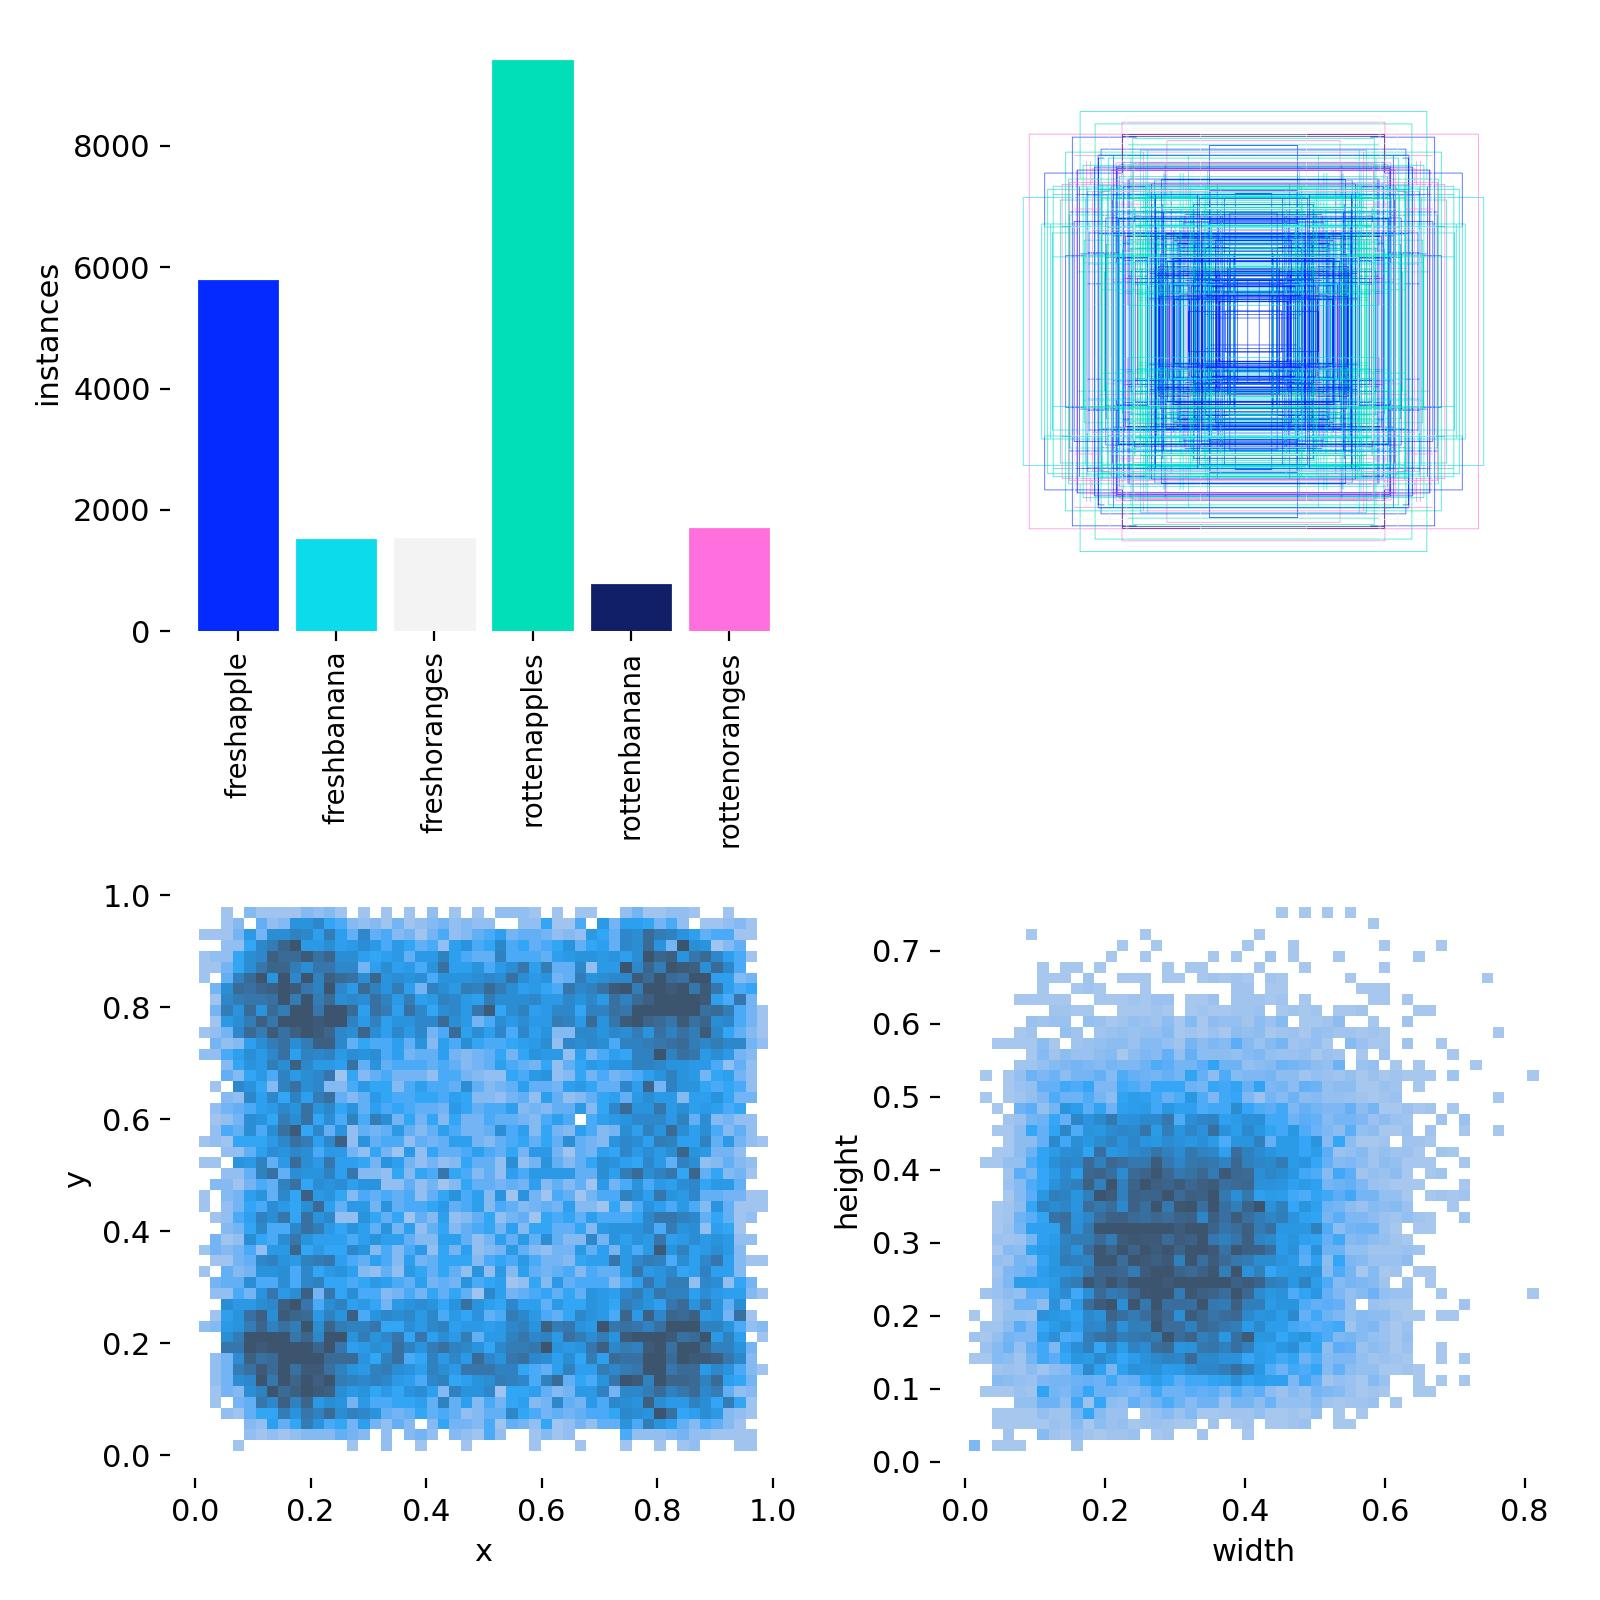

In [ ]:
Image("/content/runs/detect/train3/labels.jpg", width=600)

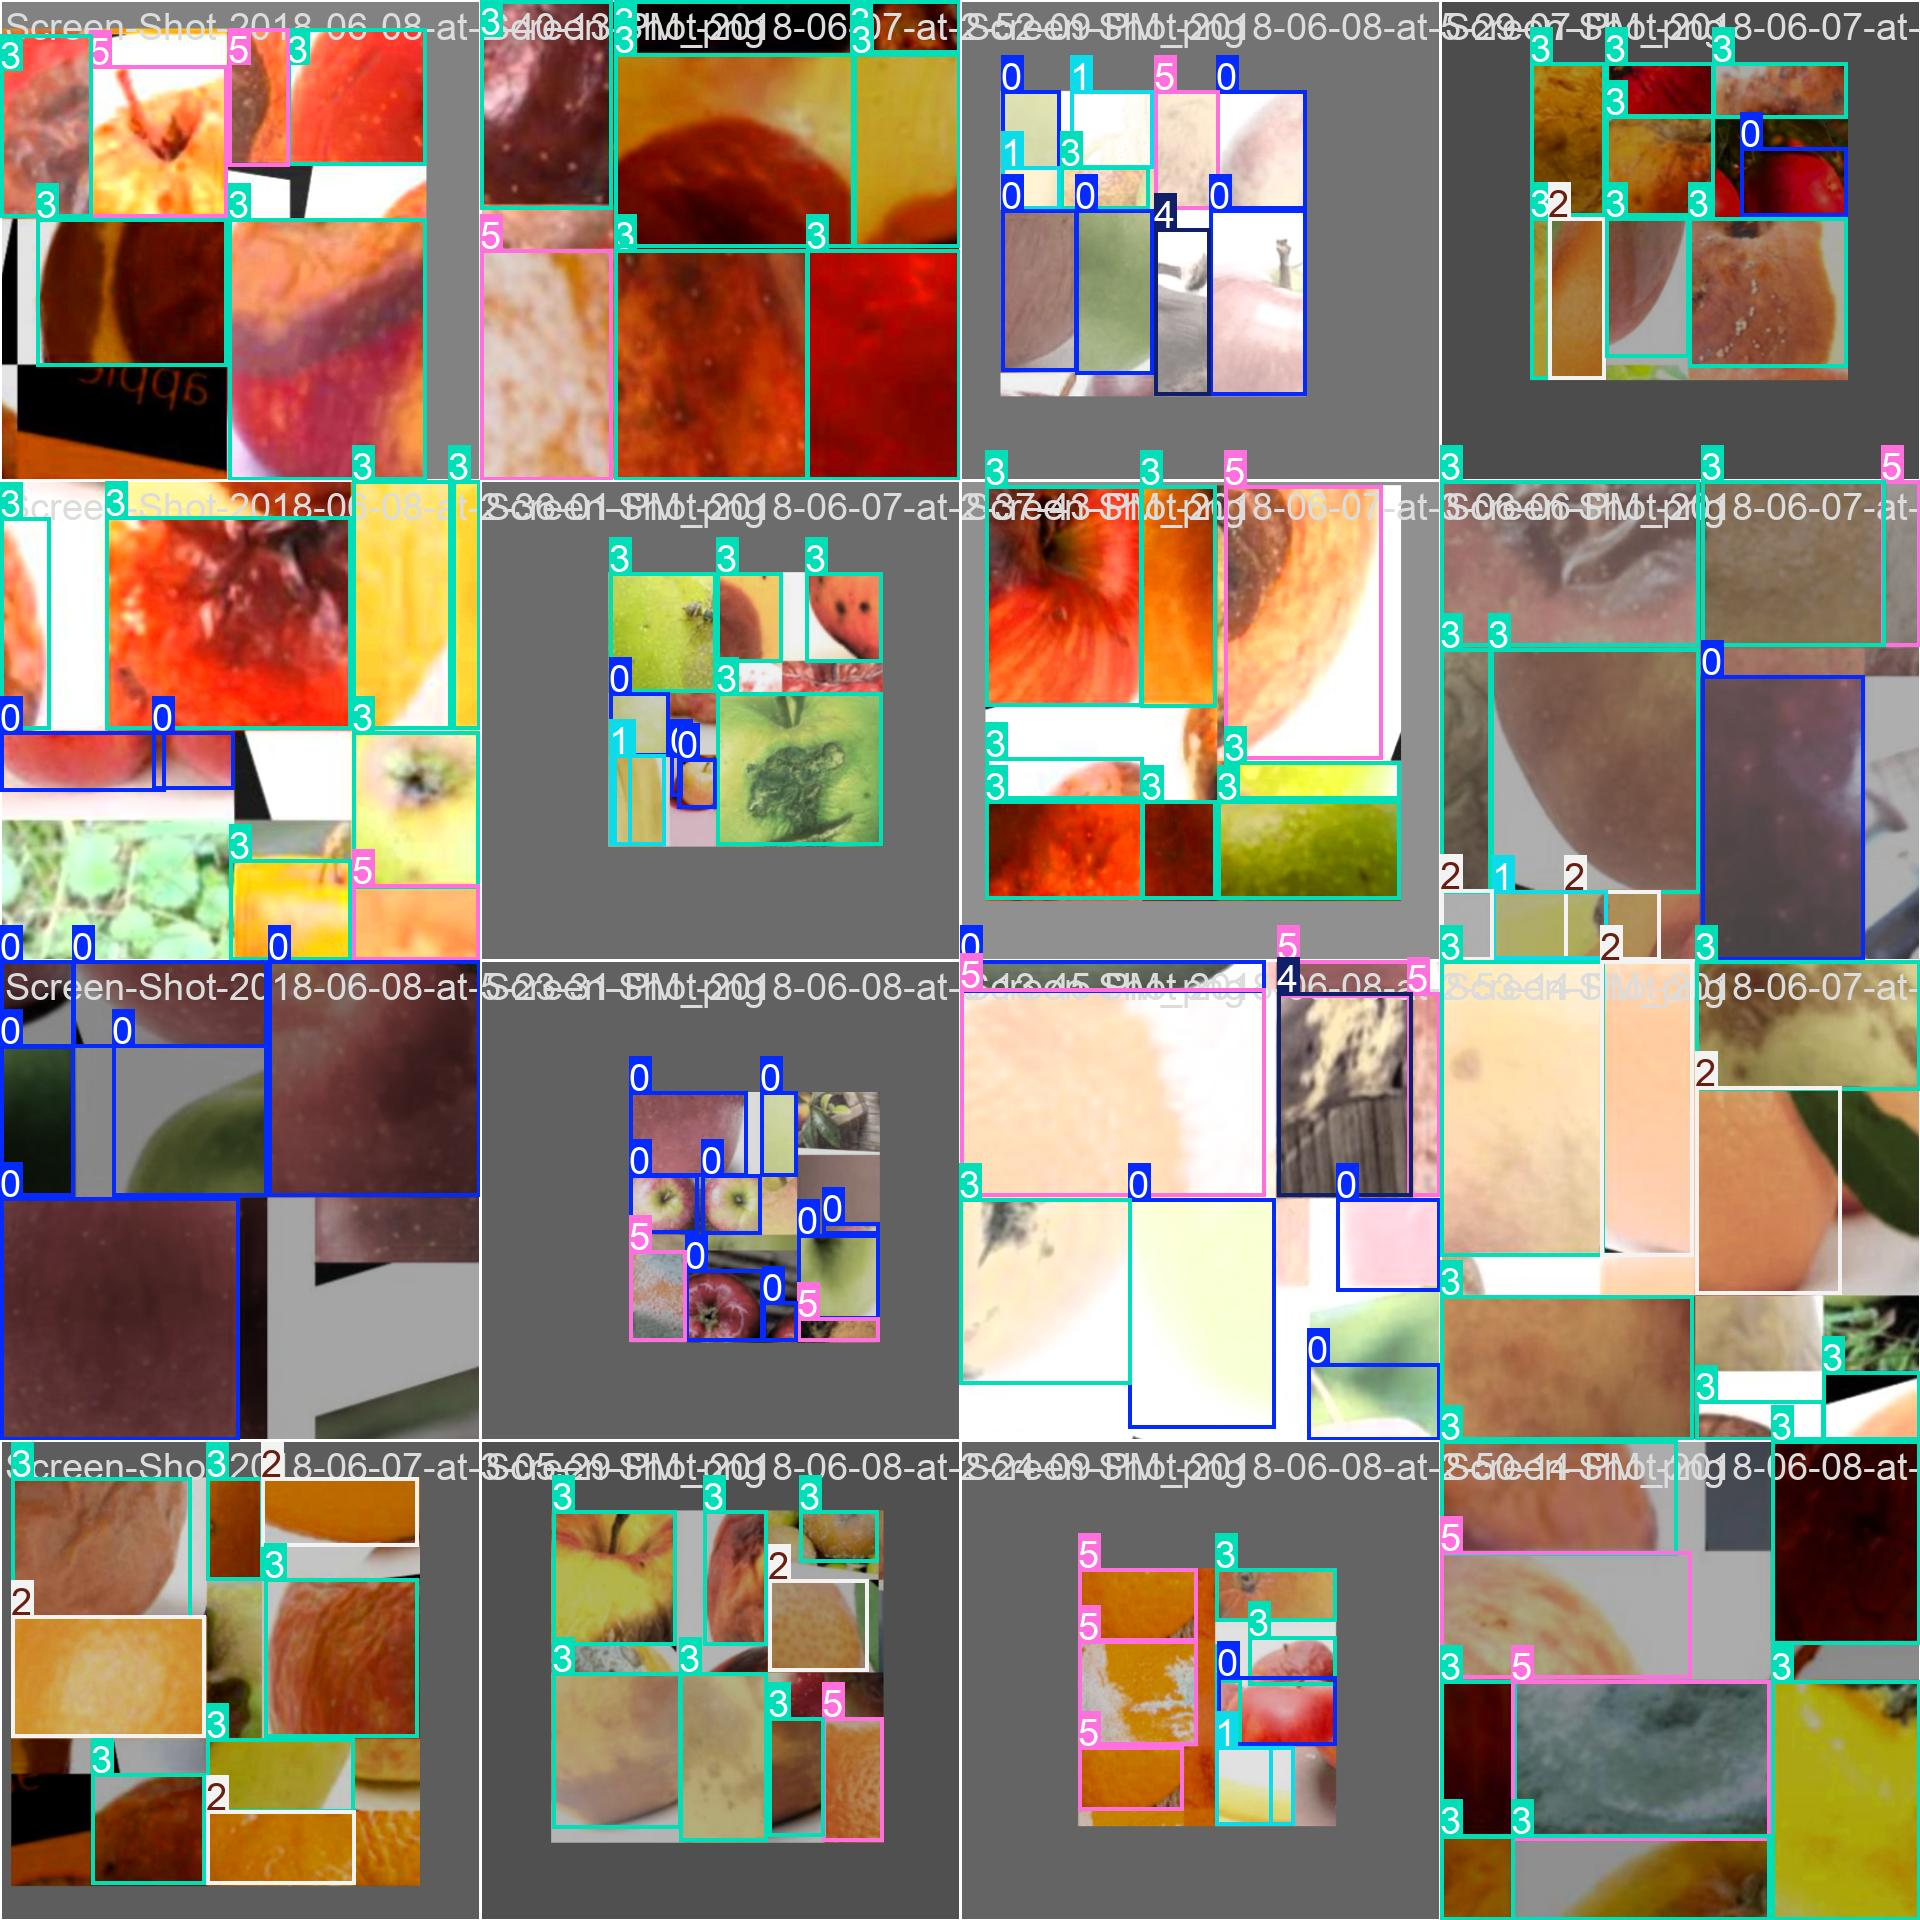

In [ ]:
Image("/content/runs/detect/train3/train_batch0.jpg", width=600)

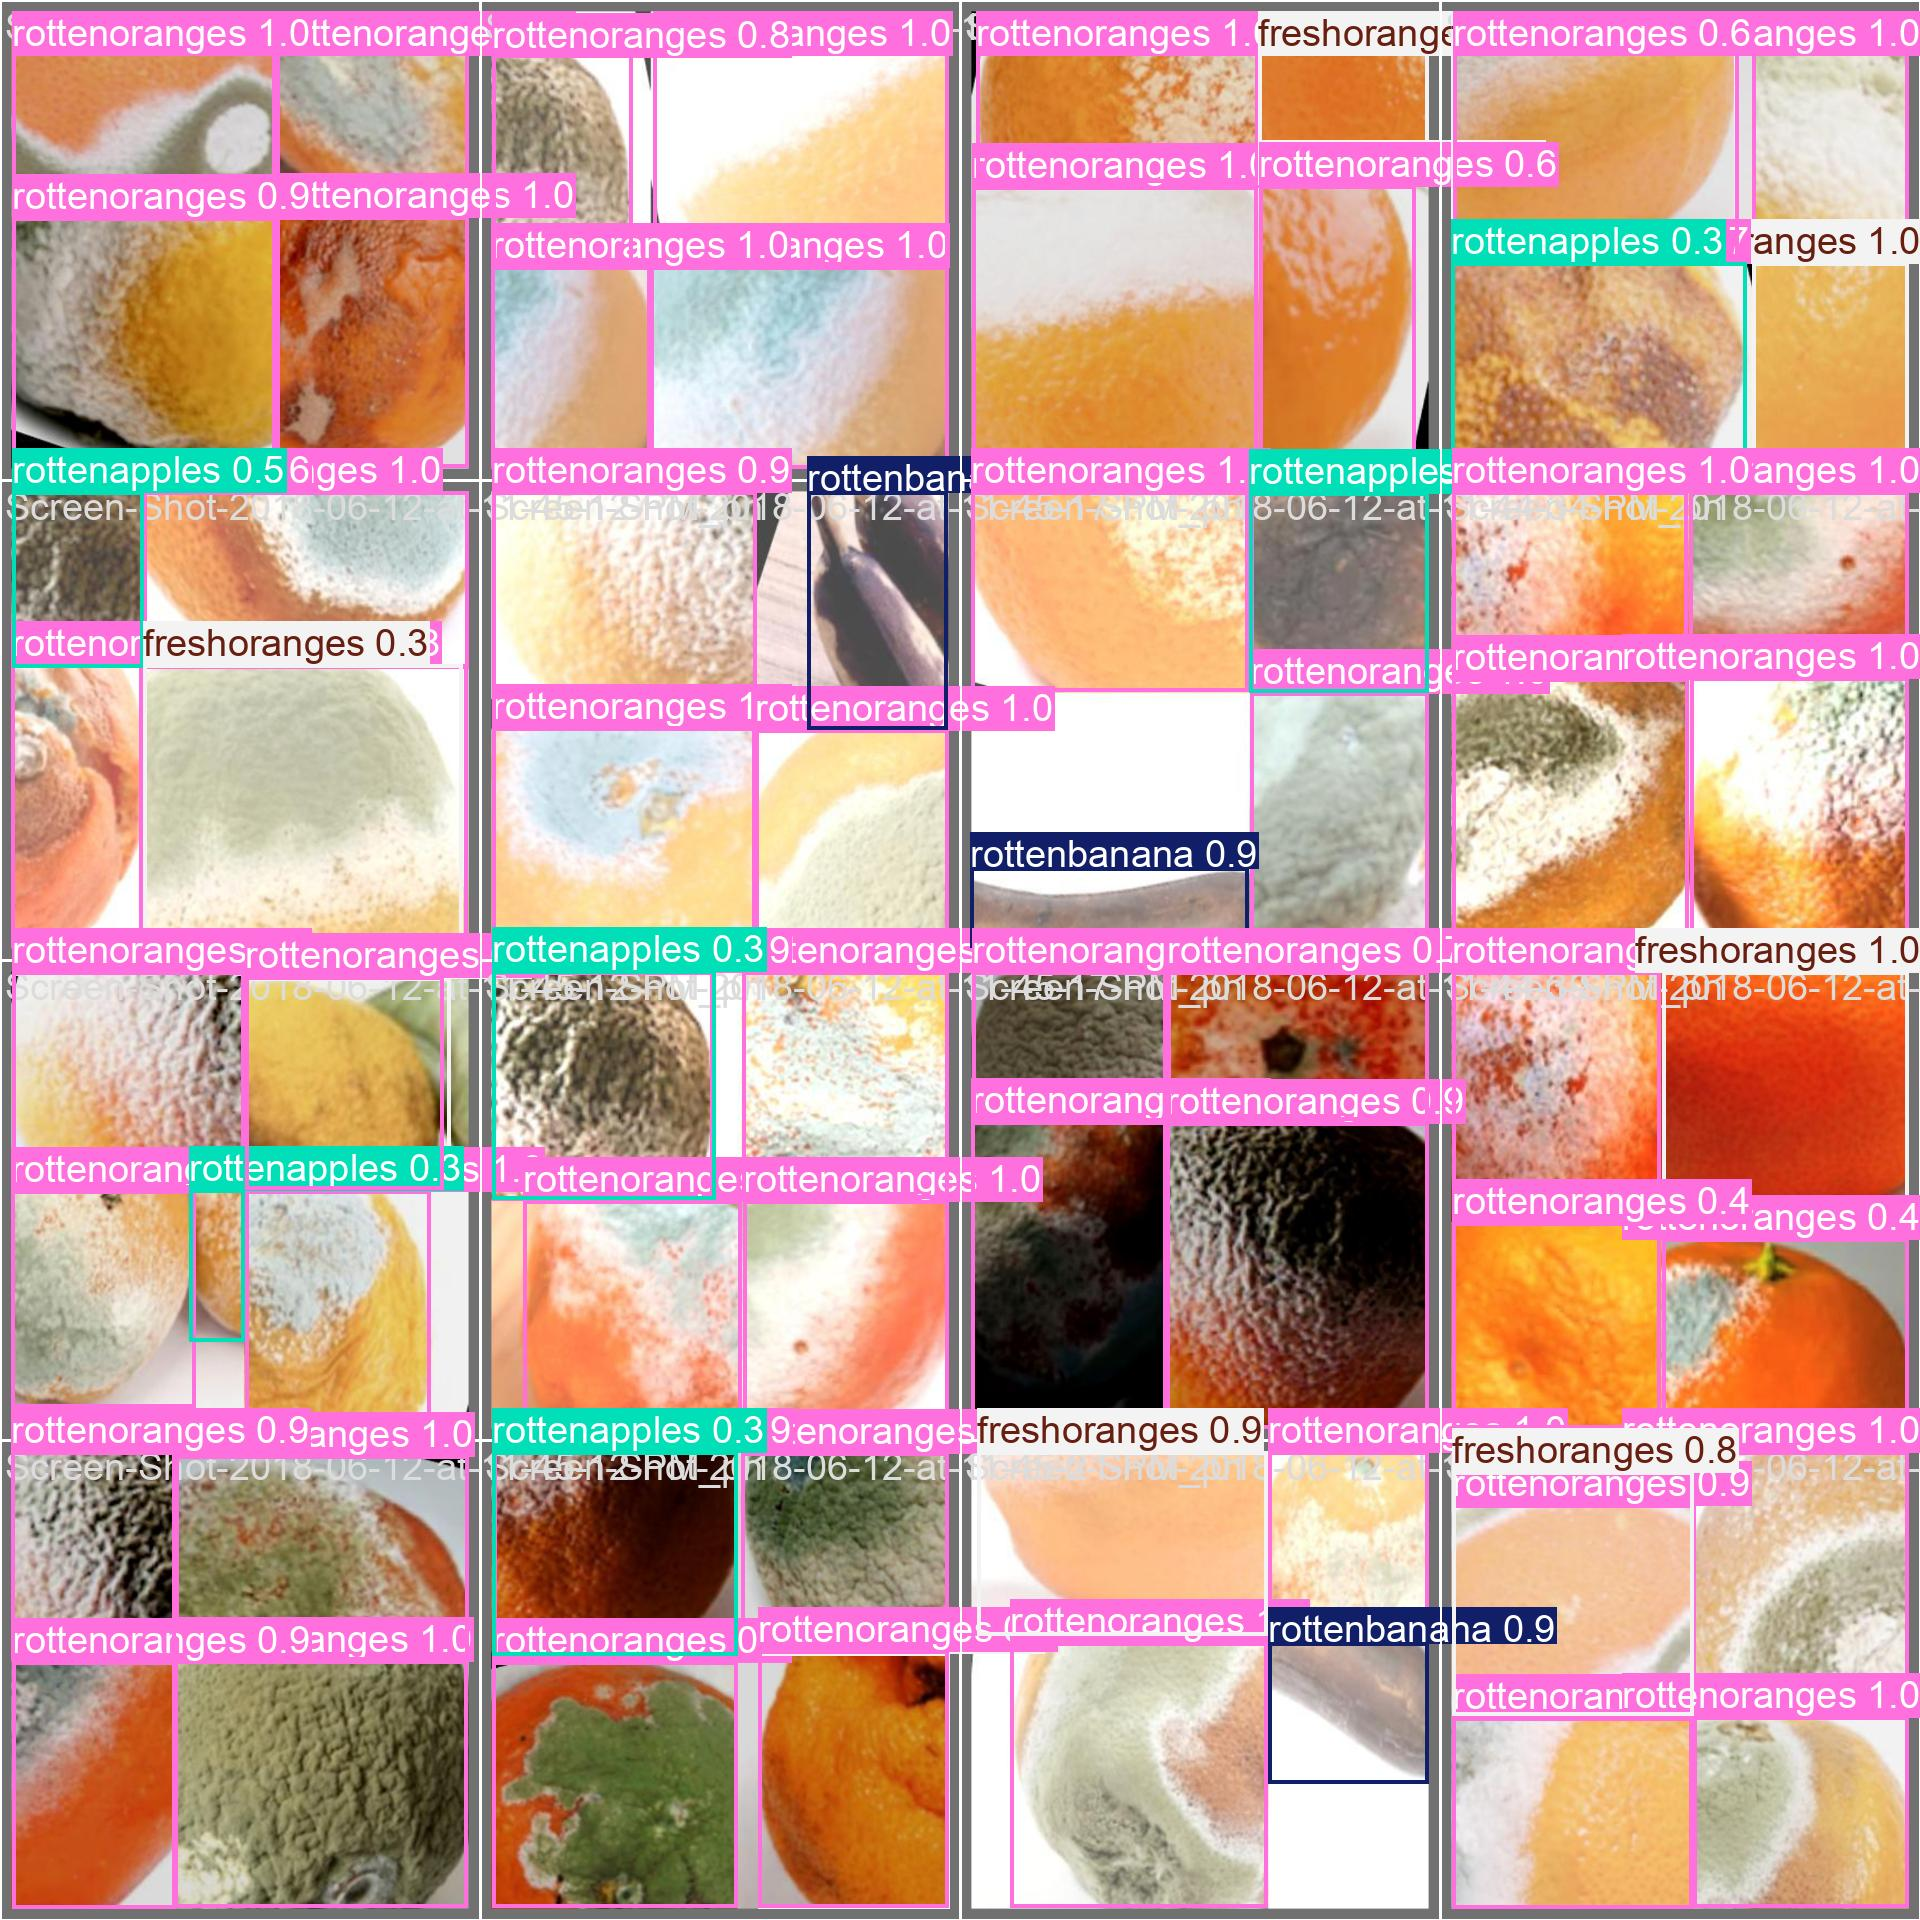

In [ ]:
Image("/content/runs/detect/train3/val_batch0_pred.jpg", width=1000)

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train3/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.10 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/meyve-1/valid/labels.cache... 352 images, 0 backgrounds, 0 corrupt: 100% 352/352 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 22/22 [00:10<00:00,  2.03it/s]
                   all        352       1479      0.555       0.53      0.569      0.506
            freshapple          1          1          0          0    0.00197    0.00197
           freshbanana         13         24      0.943      0.875      0.946      0.767
          freshoranges        139        172      0.549      0.808      0.712      0.693
          rottenapples          6          6          0          0     0.0172     0.0163
          rottenbanana         65         99       0.86      0.657      0.754      0.593
         rottenoranges        352       1177       0.9

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train3/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.10 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs

image 1/350 /content/meyve-1/test/images/Screen-Shot-2018-06-07-at-2-15-20-PM_png_jpg.rf.6976ea765d52edccc06a24ec34ae2e64.jpg: 640x640 2 rottenappless, 13.8ms
image 2/350 /content/meyve-1/test/images/Screen-Shot-2018-06-07-at-2-15-34-PM_png_jpg.rf.1643b5a0f649f4b6384407d40e89b072.jpg: 640x640 1 rottenapples, 14.3ms
image 3/350 /content/meyve-1/test/images/Screen-Shot-2018-06-07-at-2-15-50-PM_png_jpg.rf.806275cf011eb8e55fd32f36cf1409aa.jpg: 640x640 1 rottenapples, 13.5ms
image 4/350 /content/meyve-1/test/images/Screen-Shot-2018-06-07-at-2-16-18-PM_png_jpg.rf.eefc968d56bcbc93658310d3b67cfb49.jpg: 640x640 1 rottenapples, 13.8ms
image 5/350 /content/meyve-1/test/images/Screen-Shot-2018-06-07-at-2-16-41-PM_png_jpg.rf.97f4ac1c72fa06a94fadfe7a5177922a.jpg: 640x640 1 rottenapples, 13.6ms
image 6/350 /content/meyve-1/test/images/Sc

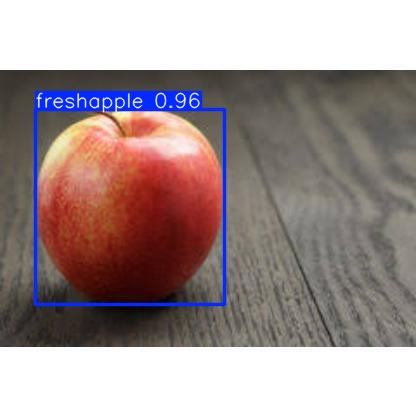

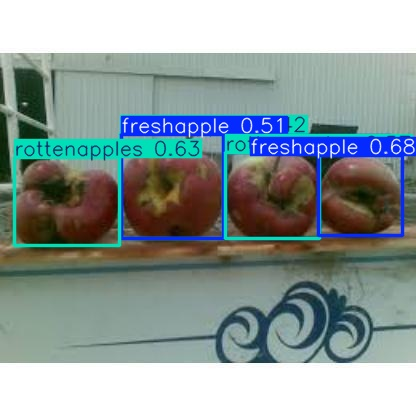

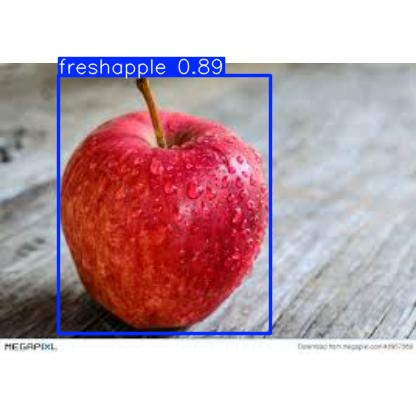

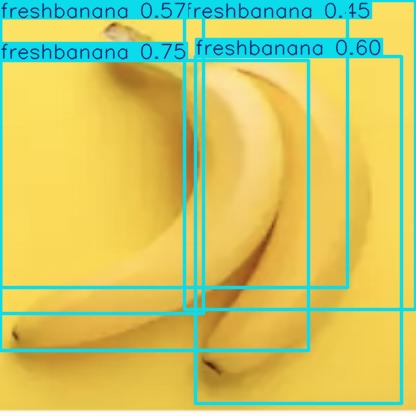

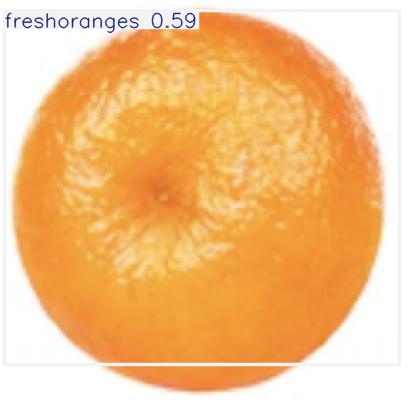

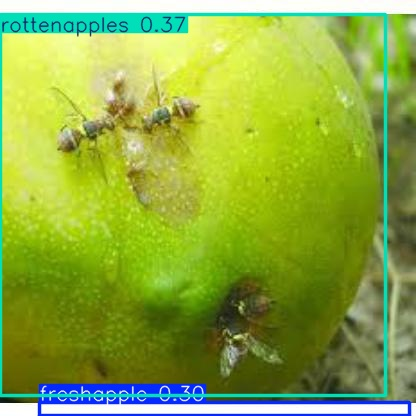

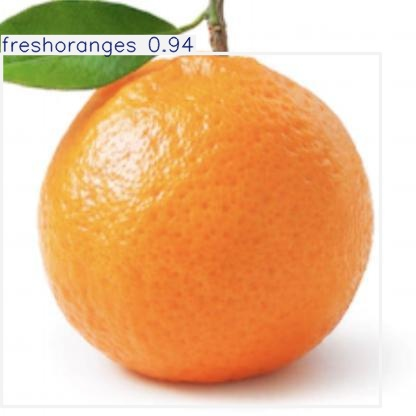

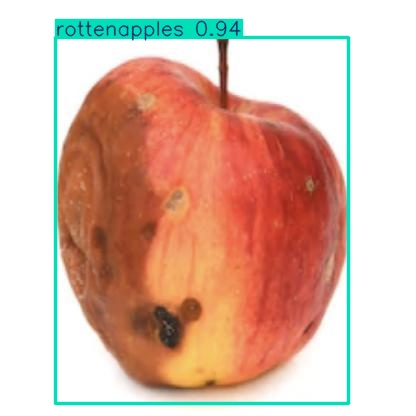

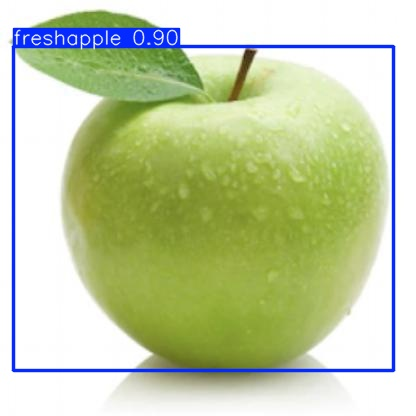

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict4'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:10]:
    display(IPyImage(filename=img, width=600))
    print("\n")